<a href="https://colab.research.google.com/github/silverCore97/CNN-exercises/blob/main/%E5%8D%B7%E8%B5%B7%E6%9D%A5_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import layers
import tensorflow.keras as keras
import warnings
warnings.filterwarnings("ignore")
import os
%matplotlib inline

In [4]:
from google.colab import drive
drive.mount("/content/drive/")
os.chdir('/content/drive/My Drive/tensorflow_data/')

Mounted at /content/drive/


In [5]:
features = pd.read_csv("temps.csv")

# First look at the features themselves
features.head()

,year,month,day,week,temp_2,temp_1,average,actual,friend
0,2016,1,1,Fri,45,45,45.6,45,29
1,2016,1,2,Sat,44,45,45.7,44,61
2,2016,1,3,Sun,45,44,45.8,41,56
3,2016,1,4,Mon,44,41,45.9,40,53
4,2016,1,5,Tues,41,40,46.0,44,41


year, month, day, week refer to the date on which the temperature was measured.

temp_2 refers to the temperatore 2 days ago.

temp_1 refers to the temperatore 1 days ago.

average refers to the average temperature on that date over the years.

actual is the true value of temperature on that date for this year.

friend might a variable of your friend randomly guessing.

In [6]:
# Organizing dates
import datetime

years = features['year']
months = features['month']
days = features['day']

dates = [str(int(year)) + '-' + str(int(month)) + '-' + str(int(day)) for year, month, day in zip(years, months,days) ]
dates = [datetime.datetime.strptime(date, '%Y-%m-%d') for date in dates]

In [7]:
dates[:5]

[datetime.datetime(2016, 1, 1, 0, 0),
 datetime.datetime(2016, 1, 2, 0, 0),
 datetime.datetime(2016, 1, 3, 0, 0),
 datetime.datetime(2016, 1, 4, 0, 0),
 datetime.datetime(2016, 1, 5, 0, 0)]

Text(0.5, 1.0, 'Friend Estimate')

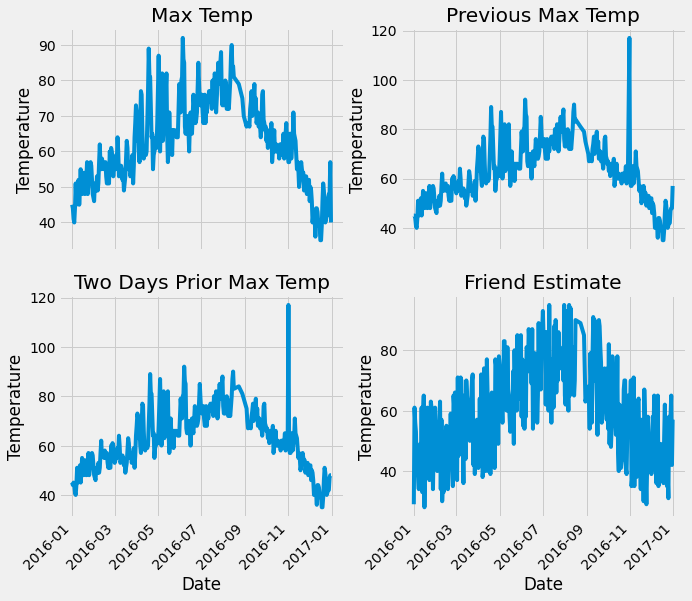

In [8]:
plt.style.use('fivethirtyeight')

# Four subplots
fig, ((ax1, ax2),(ax3, ax4)) = plt.subplots(nrows = 2, ncols = 2, figsize = (10,10))
fig.autofmt_xdate(rotation = 45)

ax1.plot(dates, features['actual'])
ax1.set_xlabel(''); ax1.set_ylabel('Temperature'); ax1.set_title('Max Temp')

ax2.plot(dates, features['temp_1'])
ax2.set_xlabel(''); ax2.set_ylabel('Temperature'); ax2.set_title('Previous Max Temp')

ax3.plot(dates, features['temp_2'])
ax3.set_xlabel('Date'); ax3.set_ylabel('Temperature'); ax3.set_title('Two Days Prior Max Temp')

ax4.plot(dates, features['friend'])
ax4.set_xlabel('Date'); ax4.set_ylabel('Temperature'); ax4.set_title('Friend Estimate')

In [9]:
# Use onehot Encoding for week days
features = pd.get_dummies(features)
features.head(5)

,year,month,day,temp_2,temp_1,average,actual,friend,week_Fri,week_Mon,week_Sat,week_Sun,week_Thurs,week_Tues,week_Wed
0,2016,1,1,45,45,45.6,45,29,1,0,0,0,0,0,0
1,2016,1,2,44,45,45.7,44,61,0,0,1,0,0,0,0
2,2016,1,3,45,44,45.8,41,56,0,0,0,1,0,0,0
3,2016,1,4,44,41,45.9,40,53,0,1,0,0,0,0,0
4,2016,1,5,41,40,46.0,44,41,0,0,0,0,0,1,0


In [10]:
labels = np.array(features['actual'])

features = features.drop('actual', axis = 1)

feature_list = list(features.columns)

features = np.array(features)

In [11]:
features.shape

(348, 14)

Preprocess data as temperatures have for example a different magnitude compared to the binary variables

In [12]:
from sklearn import preprocessing
input_features = preprocessing.StandardScaler().fit_transform(features)

In [13]:
input_features[0]

array([ 0.        , -1.5678393 , -1.65682171, -1.45311448, -1.46252836,
       -1.3470703 , -1.98891668,  2.44131112, -0.40482045, -0.40961596,
       -0.40482045, -0.40482045, -0.41913682, -0.40482045])

**Constructing the neural network with Keras**

In [45]:
model = tf.keras.Sequential()
model.add(layers.Dense(16))
model.add(layers.Dense(32))
model.add(layers.Dense(1))

In [46]:
model.compile(optimizer=tf.keras.optimizers.SGD(0.001), loss='mean_squared_error')

In [47]:
model.fit(input_features, labels, validation_split = 0.25, epochs=100, batch_size=64)

Epoch 1/100
5/5 [==============================] - 0s 33ms/step - loss: 4271.0767 - val_loss: 2932.2715
Epoch 2/100
5/5 [==============================] - 0s 7ms/step - loss: 2693.4495 - val_loss: 3768.5654
Epoch 3/100
5/5 [==============================] - 0s 7ms/step - loss: 138.0311 - val_loss: 2674.6724
Epoch 4/100
5/5 [==============================] - 0s 9ms/step - loss: 81.2503 - val_loss: 2065.8752
Epoch 5/100
5/5 [==============================] - 0s 8ms/step - loss: 74.0017 - val_loss: 1803.3837
Epoch 6/100
5/5 [==============================] - 0s 7ms/step - loss: 54.4663 - val_loss: 1519.4192
Epoch 7/100
5/5 [==============================] - 0s 7ms/step - loss: 53.1124 - val_loss: 1238.4207
Epoch 8/100
5/5 [==============================] - 0s 9ms/step - loss: 43.1114 - val_loss: 1009.9725
Epoch 9/100
5/5 [==============================] - 0s 7ms/step - loss: 64.9233 - val_loss: 667.5434
Epoch 10/100
5/5 [==============================] - 0s 9ms/step - loss: 70.8831 - val_

In [17]:
model.summary()
# Params = number of weights + number of biases

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                240       
                                                                 
 dense_1 (Dense)             (None, 32)                544       
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 817
Trainable params: 817
Non-trainable params: 0
_________________________________________________________________


In [72]:
model = tf.keras.Sequential()
model.add(layers.Dense(16, kernel_initializer = 'random_normal', kernel_regularizer = tf.keras.regularizers.l2(0.03)))
model.add(layers.Dense(32, kernel_initializer = 'random_normal', kernel_regularizer = tf.keras.regularizers.l2(0.03)))
model.add(layers.Dense(1, kernel_initializer = 'random_normal', kernel_regularizer = tf.keras.regularizers.l2(0.03)))

model.compile(optimizer=tf.keras.optimizers.SGD(0.001), loss='mean_squared_error')
model.fit(input_features, labels, validation_split=0.25, epochs=100, batch_size=64)

Epoch 1/100
5/5 [==============================] - 1s 36ms/step - loss: 4390.0488 - val_loss: 2869.2871
Epoch 2/100
5/5 [==============================] - 0s 7ms/step - loss: 4293.0923 - val_loss: 2786.5901
Epoch 3/100
5/5 [==============================] - 0s 9ms/step - loss: 4172.8291 - val_loss: 2669.3940
Epoch 4/100
5/5 [==============================] - 0s 7ms/step - loss: 3935.0906 - val_loss: 2444.3667
Epoch 5/100
5/5 [==============================] - 0s 7ms/step - loss: 2640.5349 - val_loss: 2091.2969
Epoch 6/100
5/5 [==============================] - 0s 7ms/step - loss: 123.9354 - val_loss: 1481.7592
Epoch 7/100
5/5 [==============================] - 0s 7ms/step - loss: 65.7598 - val_loss: 1323.2903
Epoch 8/100
5/5 [==============================] - 0s 7ms/step - loss: 52.1914 - val_loss: 730.1443
Epoch 9/100
5/5 [==============================] - 0s 7ms/step - loss: 72.0241 - val_loss: 649.9360
Epoch 10/100
5/5 [==============================] - 0s 8ms/step - loss: 106.4213 

Prediction with the model

In [73]:
predict = model.predict(input_features)

In [55]:
predict.shape

(348, 1)

Comparing prediction results to the actual values

In [74]:
dates = [str(int(year)) + '-' + str(int(month)) + '-' + str(int(day)) for year, month, day in zip(years, months,days) ]
dates = [datetime.datetime.strptime(date, '%Y-%m-%d') for date in dates]

true_data=pd.DataFrame(data={'date':dates,'actual':labels})

years=features[:, feature_list.index('year')]
months=features[:, feature_list.index('month')]
days=features[:, feature_list.index('day')]

test_dates = [str(int(year)) + '-' + str(int(month)) + '-' + str(int(day)) for year, month, day in zip(years, months,days) ]
test_dates = [datetime.datetime.strptime(date, '%Y-%m-%d') for date in test_dates]

predictions_data = pd.DataFrame(data = {'date':test_dates, 'prediction':predict.reshape(-1)})

Text(0.5, 1.0, 'Actual and predicted values')

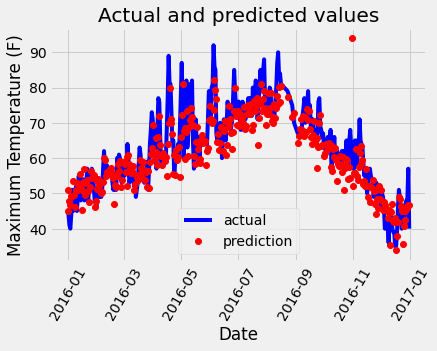

In [75]:
plt.plot(true_data['date'],true_data['actual'],'b-', label = 'actual')

plt.plot(predictions_data['date'], predictions_data['prediction'], 'ro', label = 'prediction')
plt.xticks(rotation= '60')
plt.legend()

plt.xlabel('Date'); plt.ylabel('Maximum Temperature (F)'); plt.title('Actual and predicted values')